## Load & Inspect Data

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Display structure and first few rows
print("Dataset Overview:")
print(df.info())
df.head()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None


index  age     sex     bmi  children smoker     region      charges
0      0   19  female  27.900         0    yes  southwest  16884.92400
1      1   18    male  33.770         1     no  southeast   1725.55230
2      2   28    male  33.000         3     no  southeast   4449.46200
3      3   33    male  22.705         0     no  northwest  21984.47061
4      4   32    male  28.880         0     no  northwest   3866.85520

Why this step? We want to understand what types of variables we’re dealing with (numerical/categorical), check for missing data, and scan for any obvious issues in the dataset.

The dataset contains 1,338 entries and 8 columns. Here's a quick breakdown:

🔍 Column Overview:
index: Appears redundant (just row index).

age: Age of the insured individual.

sex: Gender.

bmi: Body Mass Index.

children: Number of children covered by insurance.

smoker: Smoking status.

region: Residential region.

charges: Medical insurance charges (target variable).


✅ Initial Observations:
No missing values.

Categorical features: sex, smoker, region.

Target variable: charges.

index column can be dropped—it’s likely a duplicate index.


--- Dataset Preview ---


index  age     sex     bmi  children smoker     region      charges
0      0   19  female  27.900         0    yes  southwest  16884.92400
1      1   18    male  33.770         1     no  southeast   1725.55230
2      2   28    male  33.000         3     no  southeast   4449.46200
3      3   33    male  22.705         0     no  northwest  21984.47061
4      4   32    male  28.880         0     no  northwest   3866.85520


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB

--- Summary Statistics ---


index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


--- Missing Values ---


index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

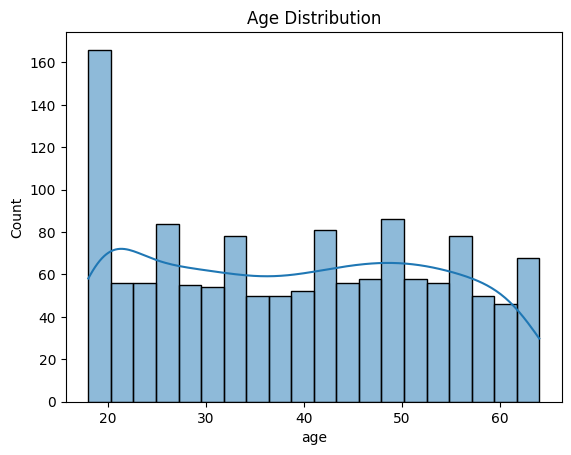

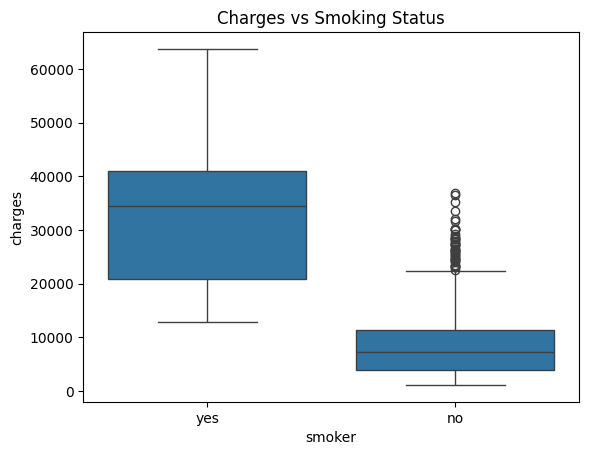

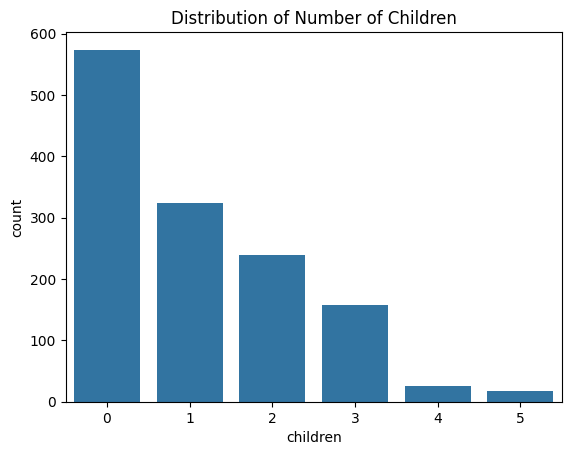

In [39]:
# Exploratory Data Analysis (EDA) and Feature Engineering on Insurance Charges Dataset

# 📘 Section 1: Introduction

"""
## Objectives:
- Learn how to perform Exploratory Data Analysis (EDA) and Feature Engineering.
- Apply a structured EDA process using a real-world dataset: **Insurance Charges Dataset**.

### What is EDA?
EDA is the process of analyzing datasets to summarize their main characteristics, often using visual methods. It's a critical step before modeling.

### Why Feature Engineering?
Feature Engineering transforms raw data into meaningful features that improve model performance and predictive power.

### Dataset Description:
Columns:
- `age`: Age of primary beneficiary.
- `sex`: Gender of the beneficiary.
- `bmi`: Body mass index.
- `children`: Number of dependents.
- `smoker`: Smoking status.
- `region`: Residential region in the US.
- `charges`: Medical insurance cost.
"""

# 📘 Section 2: Basic EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("insurance.csv")

# Initial Inspection
print("\n--- Dataset Preview ---")
display(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe())

# Check Missing Values
print("\n--- Missing Values ---")
display(df.isnull().sum())

# Task: Suggest how to handle any missing values (if present).

# Visualizations
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges vs Smoking Status")
plt.show()

sns.countplot(x='children', data=df)
plt.title("Distribution of Number of Children")
plt.show()

# Challenge: What patterns do you notice in charges vs smoker status?

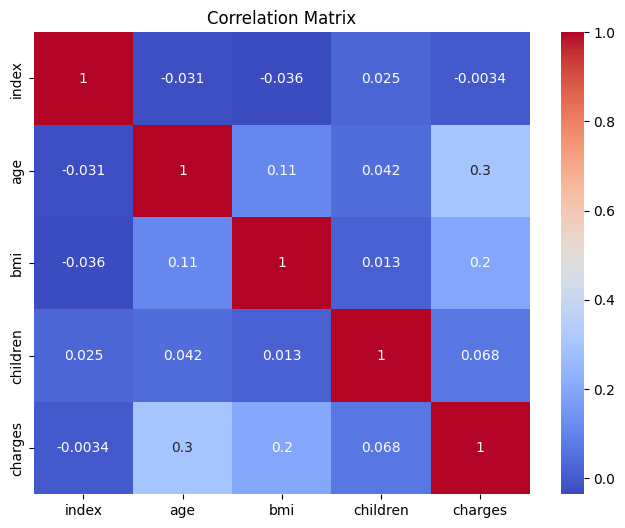

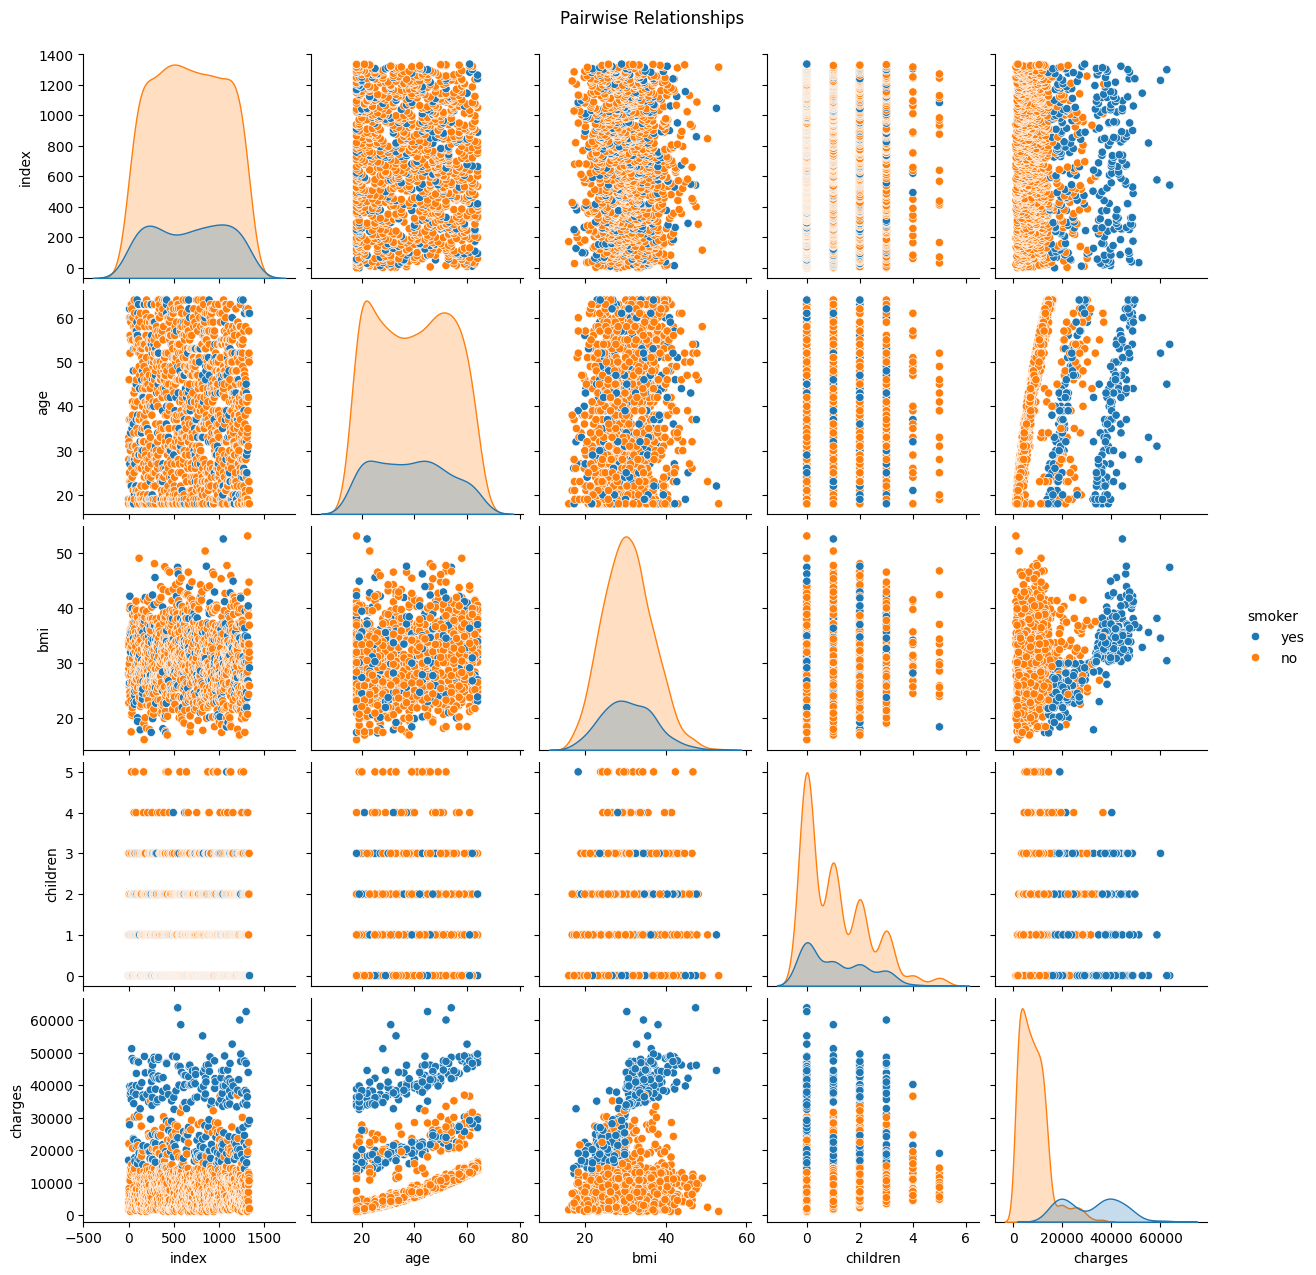

In [40]:

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for feature relationships
sns.pairplot(df, hue="smoker")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


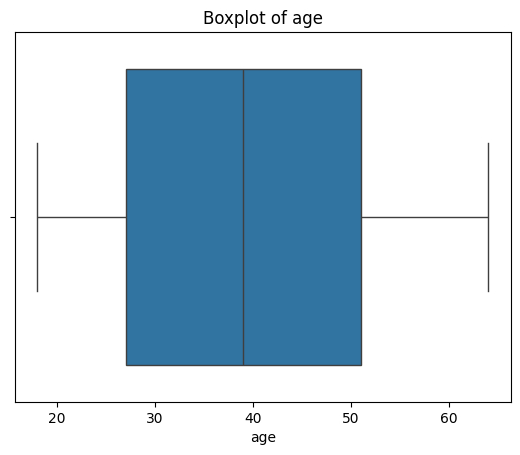

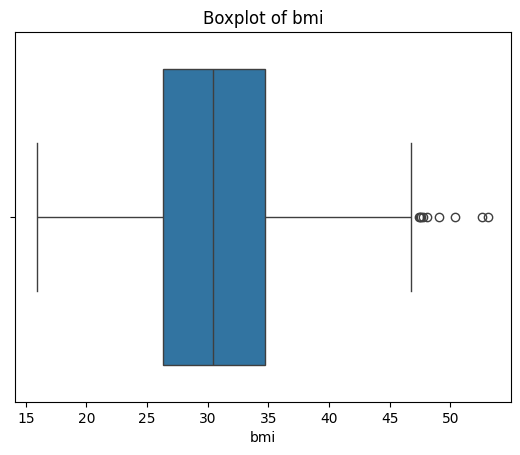

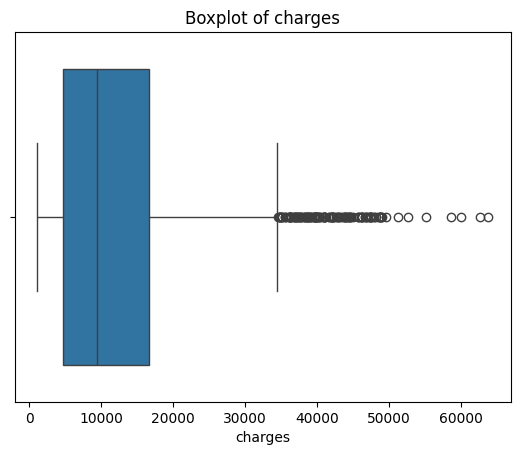

In [41]:
# Detecting Outliers using Boxplots
features = ['age', 'bmi', 'charges']
for col in features:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Challenge: Find 2 columns with significant outliers. How would you handle them?

In [42]:
# 📘 Section 4: Feature Engineering

from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])
df['smoker_encoded'] = le.fit_transform(df['smoker'])
df['region_encoded'] = le.fit_transform(df['region'])

# Creating new features
df['bmi_age_interaction'] = df['bmi'] * df['age']

# Binning Age
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 80], labels=['18-30','31-45','46-60','61+'])

# Task: Try creating a new feature combining 'smoker' and 'bmi' or 'charges'

### (optional) ###
# Skewness Fix (optional)
from scipy.stats import boxcox

# Example: Normalize 'charges'
df['charges_boxcox'], _ = boxcox(df['charges'] + 1)

# Challenge: Explore different transformations and observe model impact.

### Summary:
- We explored dataset basics: structure, summary, distributions.
- Investigated relationships via advanced EDA.
- Applied Feature Engineering based on EDA insights.

### Reflective Questions:
- What features are most important for insurance cost prediction?
- How did EDA help shape your understanding of the dataset?

### Next Steps:
- Try building a Linear Regression or Tree-based model using these features.
- Evaluate performance with and without engineered features.

### Clean Datasets

Drop Redundant Columns

In [43]:
# Drop 'index' column since it's just a row identifier
df.drop(columns='index', inplace=True)

Why? The index column doesn't carry any additional information, so it's safe to remove to keep our dataset cleaner.

Cleaning datasets is crucial for ensuring data accuracy, consistency, and reliability, which are essential for drawing meaningful insights and making informed decisions.

## Phase 2: Advanced Exploratory Data Analysis (EDA)

✍️ Narrative:

In this phase, we'll start exploring patterns and relationships in the data. We'll look at correlations, identify potential multicollinearity issues, and start thinking about how features interact with each other and with our target variable (charges).

### Step 3: Basic Descriptive Statistics

In [44]:
df.describe()

age          bmi     children       charges  sex_encoded  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.505232   
std      14.049960     6.098187     1.205493  12110.011237     0.500160   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     1.000000   
75%      51.000000    34.693750     2.000000  16639.912515     1.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

       smoker_encoded  region_encoded  bmi_age_interaction  charges_boxcox  
count     1338.000000     1338.000000          1338.000000     1338.000000  
mean         0.204783        1.515695          1211.575919       11.191088  
std          0.403694        1.104885           522.608731        1.364867  
min          0.000000        0.000000           287.280000        8.215470  
25%          0.000000        1.000000           765.625000       10.233524  
50%          0.000000        2.000000          1152.225000       11.234945  
75%          0.000000        2.000000          1589.085000       12.098797  
max          1.000000        3.000000          2845.480000       14.210812

Why? Descriptive stats give us a high-level summary of the data distribution. This helps spot skewed variables, outliers, or unusual values quickly.

### Step 4: Correlation Matrix (Numerical Features)

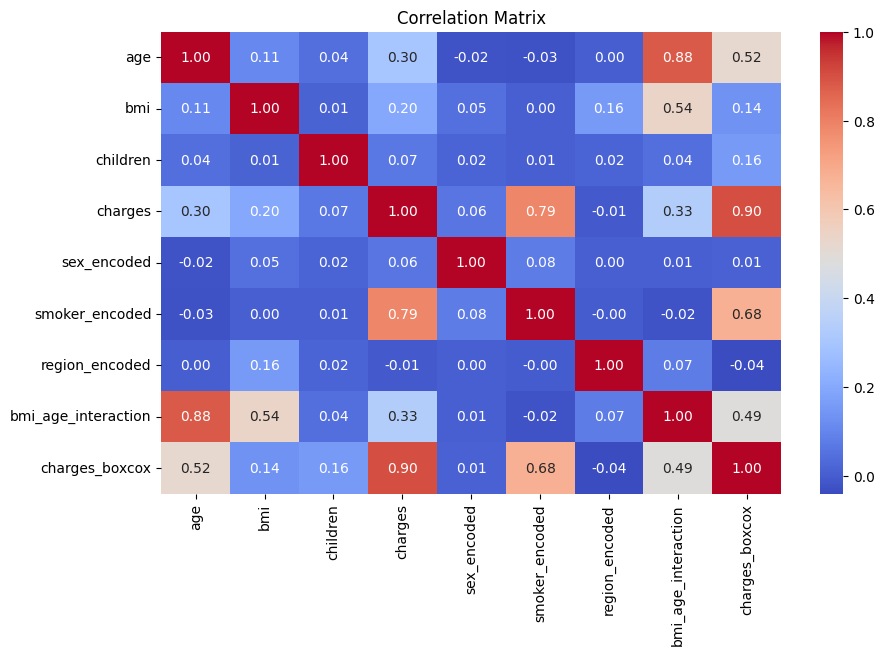

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**What we’re looking for:**

*Strong correlations (positive or negative).*

*Especially how features relate to the target variable - charges.*

*Also, high correlations between features (could signal multicollinearity).*

### 📊 Correlation Matrix – What It Tells Us

The correlation matrix helps us understand how **numerical features** relate to each other and to the target variable (`charges`).

---

#### 💡 What is Correlation?
- Values range from **-1 to +1**:
  - **+1** → Perfect positive relationship
  - **0** → No relationship
  - **-1** → Perfect negative relationship

---

#### 📈 Key Observations:

| Feature Pair           | Correlation Value | Interpretation |
|------------------------|-------------------|----------------|
| `age` ↔ `charges`       | **0.30**           | Moderate positive relationship – older people tend to have higher medical charges. |
| `bmi` ↔ `charges`       | **0.20**           | Weak positive correlation – higher BMI is slightly associated with higher charges. |
| `children` ↔ `charges`  | **0.07**           | Very weak relationship – number of children has little effect on charges. |
| `age` ↔ `bmi`           | **0.11**           | Very low correlation – BMI doesn't change much with age. |
| `bmi` ↔ `children`      | **0.01**           | No meaningful relationship. |
| `age` ↔ `children`      | **0.04**           | Very weak correlation. |

---

#### ⚠️ Any Multicollinearity?
- **No signs of high multicollinearity.**
- All feature-to-feature correlations are low, so our model won't face confusion due to redundant information.

---

#### ✍️ Final Thoughts:
- `age` is the most informative numerical feature so far.
- `bmi` may be useful when combined with other factors.
- `children` seems less relevant for predicting charges.
- Note: **Categorical features (like `smoker`) are not shown here** because correlation only works on numerical columns — but they might still have a huge effect in modeling.

> ✅ Use this analysis to decide which features might be most valuable in your predictive model.

### Step 5: Feature Relationships – Pairplots

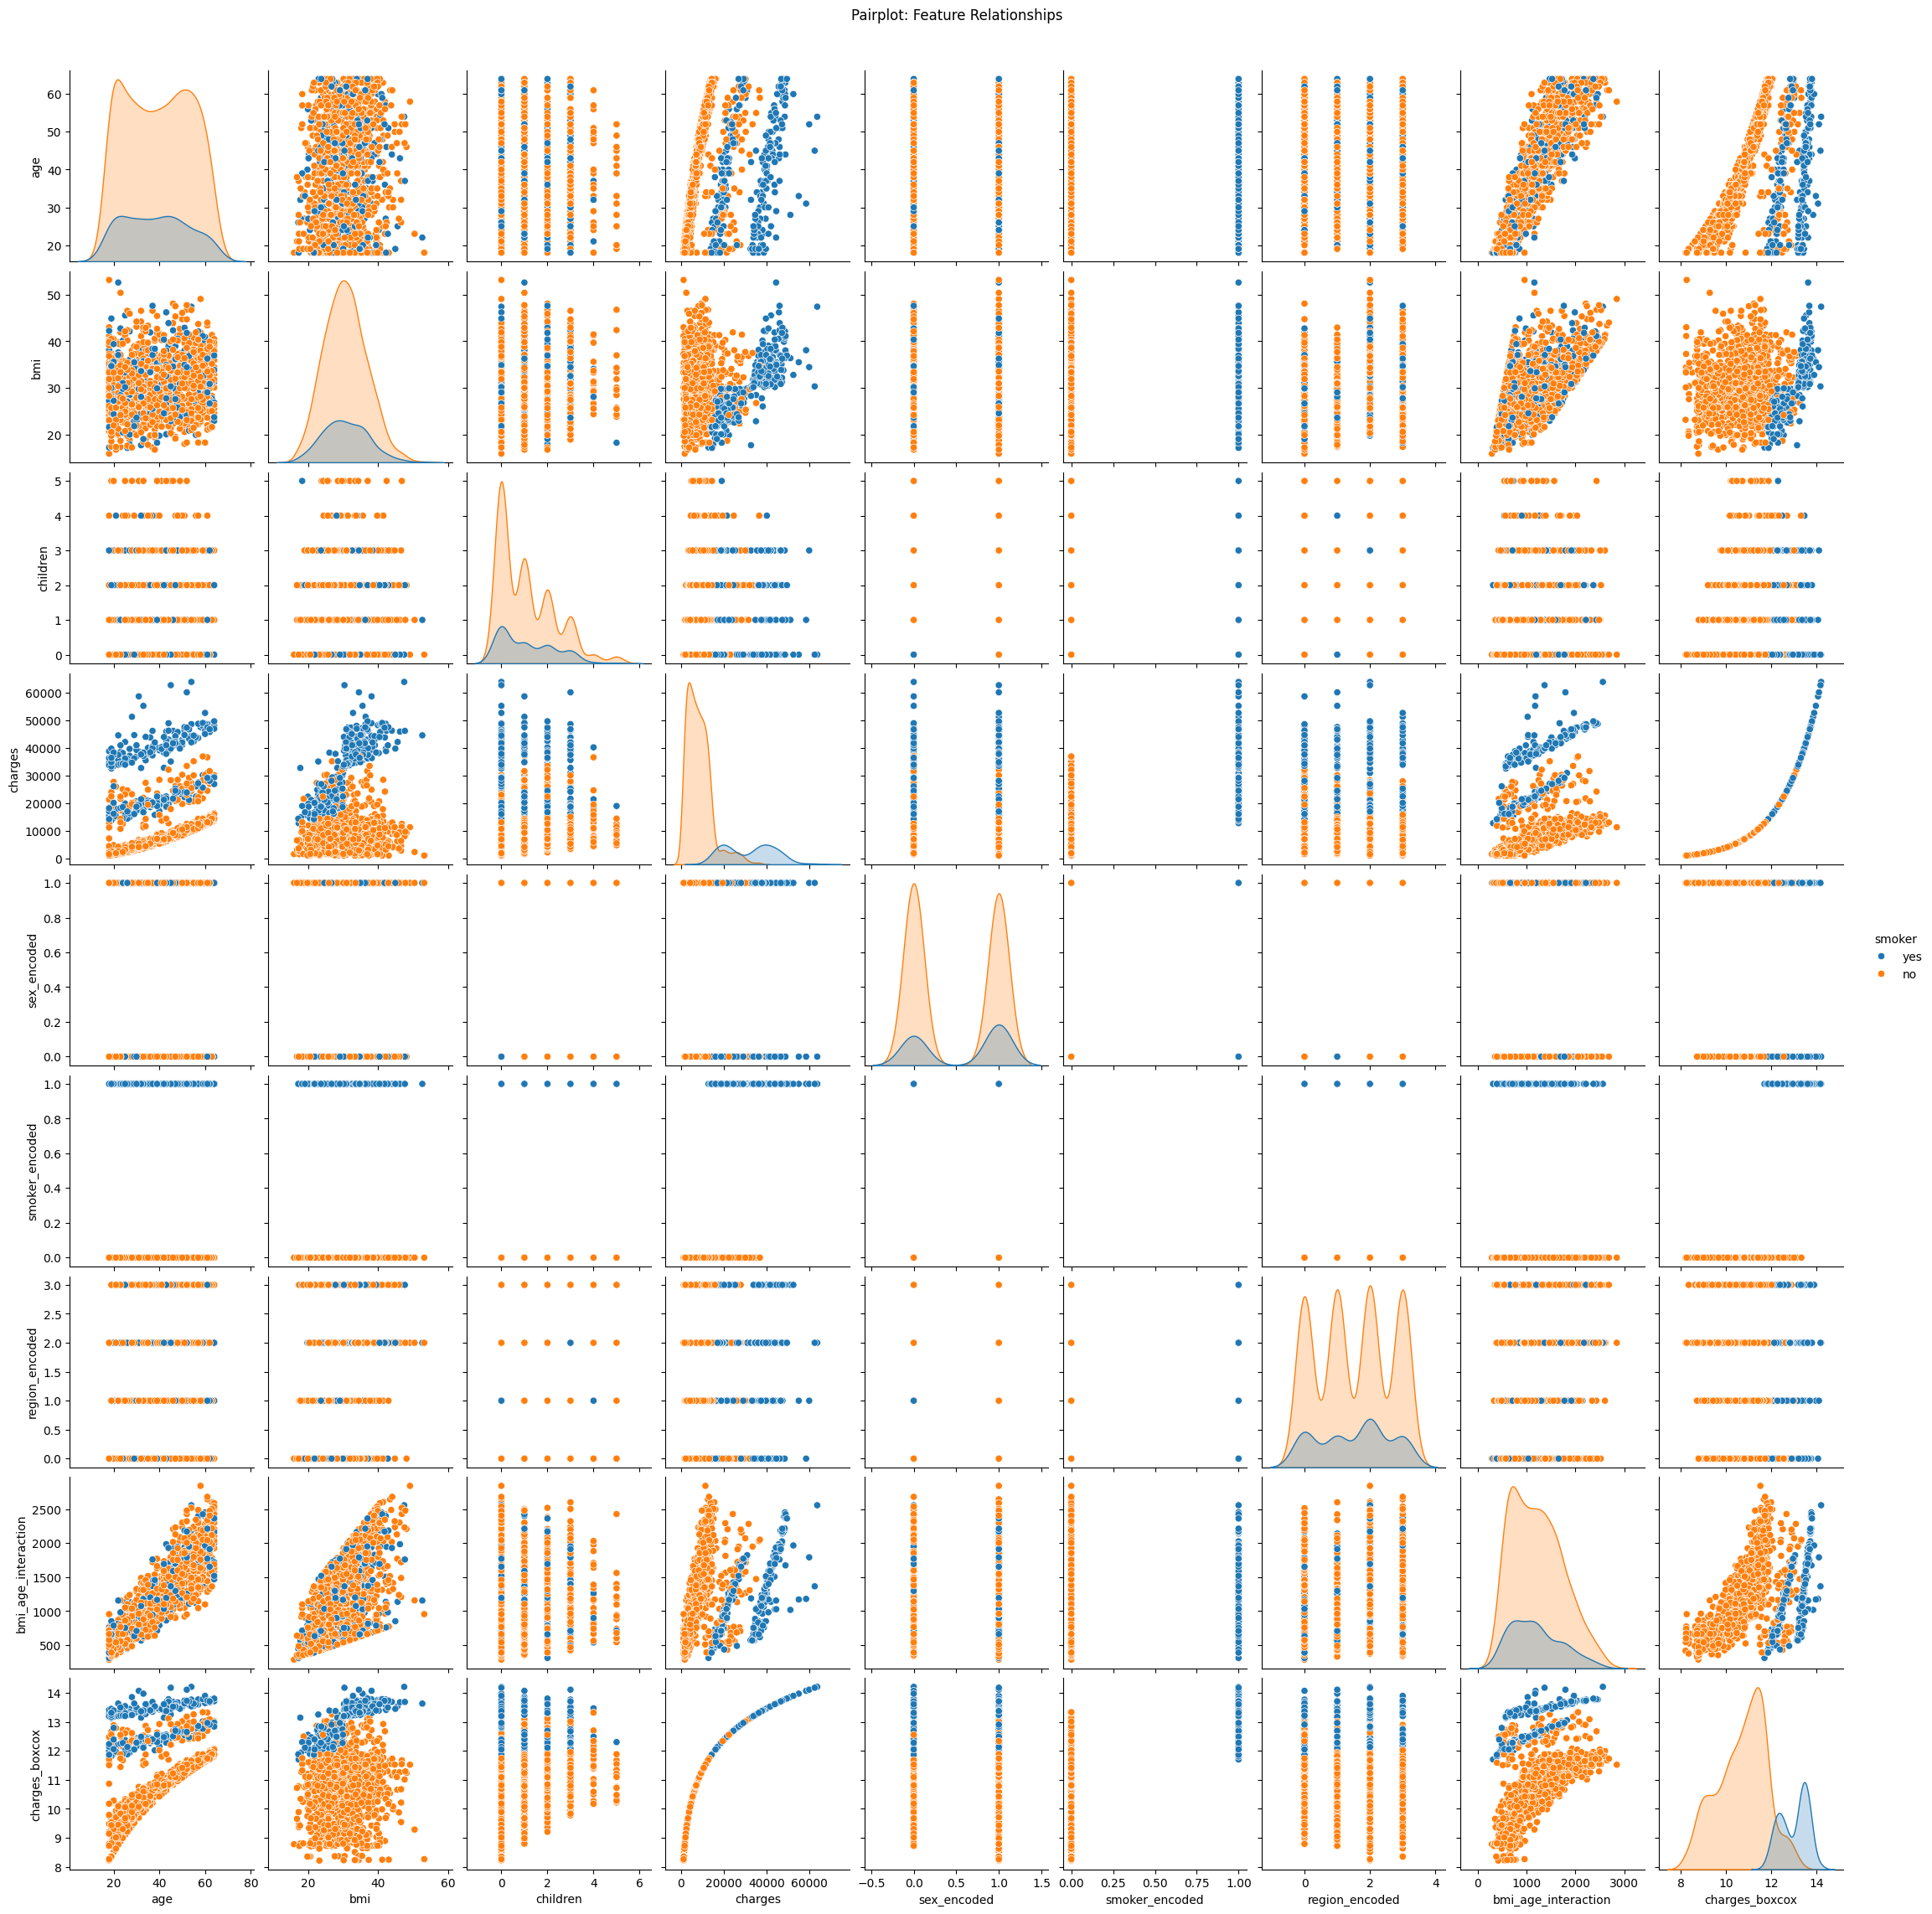

In [46]:
# Visual pairwise plot to see distribution & relationships
sns.pairplot(df, diag_kind='kde', hue='smoker')
plt.suptitle('Pairplot: Feature Relationships', y=1.02)
plt.show()


Why? This helps us understand how each feature distributes and interacts with others. Adding hue='smoker' shows class separation (e.g., do smokers pay more in charges?).

### 📊 Pairplot Analysis – Feature Relationships

This pairplot helps us visually understand how features relate to each other and how **smoker status** affects charges.

---

#### 🔹 Charges vs Smoker
- **Smokers (blue)** have **significantly higher charges** than non-smokers.
- Smoker status is clearly a strong driver of medical costs.
- This relationship is **very clear visually**, even though it wasn’t captured in the numeric correlation matrix (since `smoker` is categorical).

---

#### 🔹 Charges vs Age
- As **age increases**, **charges generally increase** too.
- This is especially true for smokers — older smokers tend to have the highest charges.

---

#### 🔹 Charges vs BMI
- There's a mild trend where **higher BMI** is associated with **higher charges**, but it’s not very strong on its own.
- Again, smokers with high BMI tend to have the highest costs.

---

#### 🔹 Children vs Charges
- **Number of children** doesn’t show a strong relationship with charges.
- Charges seem fairly spread out regardless of how many children someone has.

---

#### 🔹 Distribution Patterns
- **Age and BMI** have fairly normal (bell-shaped) distributions.
- **Charges** are **right-skewed** — most people have lower charges, but a few have extremely high costs.

---

> ✅ This visual analysis helps us see how important **smoker status**, **age**, and **BMI** might be in predicting insurance charges.


### Step 6: Categorical Feature Analysis

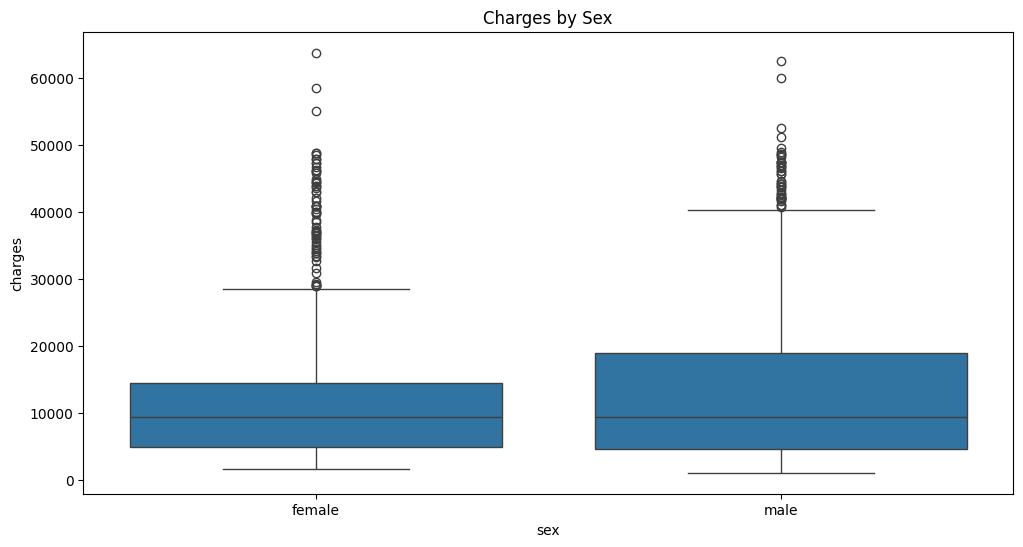

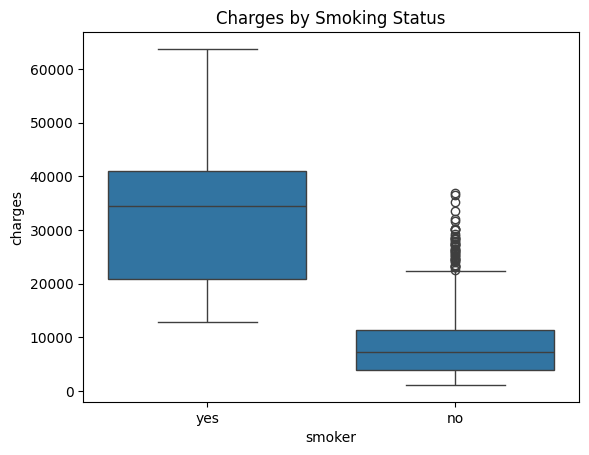

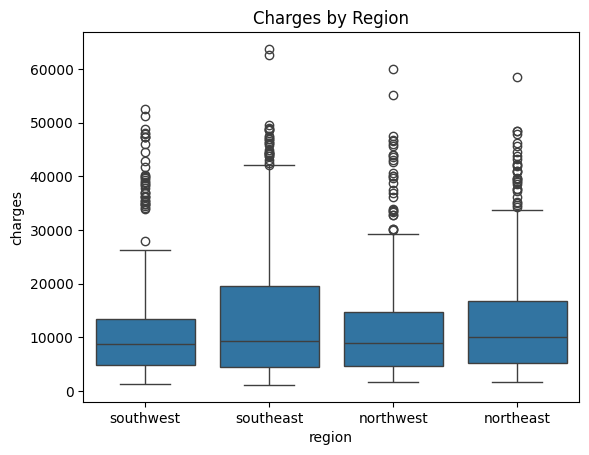

In [47]:
# Boxplots for categorical features vs. charges
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()

sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()


### 📦 Boxplot Analysis – Charges by Categories

These boxplots help us compare how insurance charges vary across different groups.

---

#### 📌 Charges by Sex
- Both **males and females** have similar charge distributions.
- **No major difference** in median or spread.
- Gender does **not seem to strongly affect charges**.
- Outliers (very high charges) are present in both groups.

---

#### 📌 Charges by Smoking Status
- **Smokers** pay **much higher charges** than non-smokers.
- The difference is very clear — even low-charge smokers often pay more than high-charge non-smokers.
- **Smoker status is a key driver of medical cost**.

---

#### 📌 Charges by Region
- **Charges are fairly similar across all regions**.
- **Southeast** shows slightly higher variation and outliers.
- But overall, **region does not have a strong impact** on charges.

---

✅ **Summary**:
- **Smoker status** shows the biggest impact on charges.
- **Sex and region** do not play a major role in determining costs.


### Step 7: Multicollinearity Check (Variance Inflation Factor - VIF)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a fresh copy
df_vif = df.copy()

# Drop target and any non-numeric/categorical-binned columns
drop_cols = ['charges', 'charges_boxcox', 'age_group']  # age_group is categorical
df_vif = df_vif.drop(columns=drop_cols, errors='ignore')

# Optional: Drop original text-based categorical columns since you've already encoded them
df_vif = df_vif.drop(columns=['sex', 'smoker', 'region'], errors='ignore')

# Keep only numerical columns and encoded versions
X = df_vif.select_dtypes(include=['int64', 'float64'])

# Convert everything to float (if needed)
X = X.astype(float)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("✅ VIF Table:\n")
print(vif_data)


✅ VIF Table:

               Feature        VIF
0                  age  29.770466
1                  bmi  12.951820
2             children   1.823758
3          sex_encoded   2.029867
4       smoker_encoded   1.266330
5       region_encoded   2.950316
6  bmi_age_interaction  35.321973


Why? VIF tells us if any feature is excessively correlated with others. A high VIF (>10 usually) suggests multicollinearity issues — meaning the model might struggle to distinguish which feature is truly impacting the target.


### 🧠 Variance Inflation Factor (VIF) – Multicollinearity Check

VIF helps detect multicollinearity — when features are too closely related to each other.

---

#### 📌 VIF Table Summary:

| Feature               | VIF     | Notes |
|------------------------|---------|-------|
| **age**               | 29.77   | 🚨 Very high — likely due to correlation with `bmi_age_interaction`. |
| **bmi**               | 12.95   | ⚠️ High — some multicollinearity. |
| **children**          | 1.82    | ✅ No issue. |
| **sex_encoded**       | 2.03    | ✅ Acceptable. |
| **smoker_encoded**    | 1.27    | ✅ No issue. |
| **region_encoded**    | 2.95    | ✅ Acceptable. |
| **bmi_age_interaction** | 35.32 | 🚨 Extremely high — strongly correlated with both `age` and `bmi`. |

---

#### 🧠 Interpretation:

- `bmi_age_interaction` is **highly collinear** with both `bmi` and `age`, inflating their VIFs.
- We may consider **dropping one of the correlated features** (`bmi_age_interaction`, `age`, or `bmi`) to reduce redundancy.
- No serious multicollinearity concern among categorical variables.

> ✅ Tip: High VIF isn’t always bad, but it can cause instability in models like **Linear Regression**.



## 🔧 Phase 3: Feature Engineering & Model Readiness

### Step 1: Scaling Numerical Features

In [49]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
num_features = ['age', 'bmi', 'children']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

# View result
df_scaled.head()


age     sex       bmi  children smoker     region      charges  \
0 -1.438764  female -0.453320 -0.908614    yes  southwest  16884.92400   
1 -1.509965    male  0.509621 -0.078767     no  southeast   1725.55230   
2 -0.797954    male  0.383307  1.580926     no  southeast   4449.46200   
3 -0.441948    male -1.305531 -0.908614     no  northwest  21984.47061   
4 -0.513149    male -0.292556 -0.908614     no  northwest   3866.85520   

   sex_encoded  smoker_encoded  region_encoded  bmi_age_interaction age_group  \
0            0               1               3              530.100     18-30   
1            1               0               2              607.860     18-30   
2            1               0               2              924.000     18-30   
3            1               0               1              749.265     31-45   
4            1               0               1              924.160     31-45   

   charges_boxcox  
0       12.121119  
1        8.805044  
2       10.142156  
3       12.526566  
4        9.940530

Why? Many ML models are sensitive to the scale of data (e.g., distance-based models like KNN, SVM). StandardScaler brings numerical features to a common scale (mean=0, std=1).

### 📏 StandardScaler – What It Does

`StandardScaler.fit_transform()` from **scikit-learn** is used to **standardize numerical features**.

- Transforms data to have **mean = 0** and **standard deviation = 1**.
- Formula: *(value - mean) / std deviation*
- Useful when features have **different scales**, which can affect model performance.
- ⚠️ **Note:** It’s sensitive to **outliers**, as they influence the mean and std.

### Step 2: Encoding Categorical Features

In [50]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_scaled, columns=['sex', 'smoker', 'region'], drop_first=True)

# View result
df_encoded.head()


age       bmi  children      charges  sex_encoded  smoker_encoded  \
0 -1.438764 -0.453320 -0.908614  16884.92400            0               1   
1 -1.509965  0.509621 -0.078767   1725.55230            1               0   
2 -0.797954  0.383307  1.580926   4449.46200            1               0   
3 -0.441948 -1.305531 -0.908614  21984.47061            1               0   
4 -0.513149 -0.292556 -0.908614   3866.85520            1               0   

   region_encoded  bmi_age_interaction age_group  charges_boxcox  sex_male  \
0               3              530.100     18-30       12.121119     False   
1               2              607.860     18-30        8.805044      True   
2               2              924.000     18-30       10.142156      True   
3               1              749.265     31-45       12.526566      True   
4               1              924.160     31-45        9.940530      True   

   smoker_yes  region_northwest  region_southeast  region_southwest  
0        True             False             False              True  
1       False             False              True             False  
2       False             False              True             False  
3       False              True             False             False  
4       False              True             False             False

Why One-Hot Encoding? Categorical variables need to be converted into numbers. One-hot encoding creates binary flags for each category and avoids ordinal assumptions. drop_first=True avoids dummy variable trap (redundant information).

### 🔢 One-Hot Encoding – Converting Categorical Data

We use `pd.get_dummies()` to convert **categorical columns** (like `sex`, `smoker`, and `region`) into **binary columns**.

- Each category becomes a separate column with `True/False` values.
- `drop_first=True` removes one column per category to **avoid redundancy** (called the "dummy variable trap").

---

#### ✅ Why One-Hot Encoding?
- Machine learning models need **numerical input**, not text.
- One-hot encoding helps us represent categories **without assuming any order or priority**.
- Keeps all features **equal and model-friendly**.

> Example:  
Instead of `region` having values like "northwest", "southeast", etc.,  
we now have new columns like `region_northwest`, `region_southeast`, etc., with binary values.


### Step 3: Handling Outliers (Clipping Approach)

In [51]:
# Clip outliers in 'bmi' and 'charges'
df_encoded['bmi'] = df_encoded['bmi'].clip(lower=df_encoded['bmi'].quantile(0.01), upper=df_encoded['bmi'].quantile(0.99))
df_encoded['charges'] = df_encoded['charges'].clip(lower=df_encoded['charges'].quantile(0.01), upper=df_encoded['charges'].quantile(0.99))

# View effect
df_encoded.describe()


age          bmi      children       charges  sex_encoded  \
count  1.338000e+03  1338.000000  1.338000e+03   1338.000000  1338.000000   
mean  -1.805565e-16    -0.002244 -5.576008e-17  13221.583463     0.505232   
std    1.000374e+00     0.988379  1.000374e+00  11940.429739     0.500160   
min   -1.509965e+00    -2.094560 -9.086137e-01   1252.972730     0.000000   
25%   -8.691547e-01    -0.716406 -9.086137e-01   4740.287150     0.000000   
50%   -1.474046e-02    -0.043209 -7.876719e-02   9382.033000     1.000000   
75%    8.396738e-01     0.661157  7.510793e-01  16639.912515     1.000000   
max    1.765289e+00     2.582799  3.240619e+00  48537.480726     1.000000   

       smoker_encoded  region_encoded  bmi_age_interaction  charges_boxcox  
count     1338.000000     1338.000000          1338.000000     1338.000000  
mean         0.204783        1.515695          1211.575919       11.191088  
std          0.403694        1.104885           522.608731        1.364867  
min          0.000000        0.000000           287.280000        8.215470  
25%          0.000000        1.000000           765.625000       10.233524  
50%          0.000000        2.000000          1152.225000       11.234945  
75%          0.000000        2.000000          1589.085000       12.098797  
max          1.000000        3.000000          2845.480000       14.210812

Why? Outliers can distort model training. Instead of removing data, clipping gently trims extreme values to 1st/99th percentile range — a balanced approach.

### ✂️ Handling Outliers – Clipping Approach

Outliers can affect model performance by skewing results.

We use **clipping** to gently limit extreme values:
- Values below the **1st percentile** are set to the 1st percentile.
- Values above the **99th percentile** are set to the 99th percentile.

✅ This keeps most data intact while reducing the effect of extreme values.

> A balanced way to handle outliers **without deleting data**.


### Step 4: Feature Selection – Redundancy Check

In [52]:
from sklearn.feature_selection import VarianceThreshold

# Create a copy to safely modify
X_encoded = df_encoded.copy()

# Drop 'charges' (target) and 'age_group' (categorical bin)
X_encoded = X_encoded.drop(columns=['charges'], errors='ignore')
X_encoded = X_encoded.drop(columns=['age_group'], errors='ignore')

# Ensure all remaining columns are numeric
X_encoded = X_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).astype(float)

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X_encoded)

# Identify features with low variance
low_variance_features = X_encoded.columns[~selector.get_support()]
print("✅ Low Variance Features (to consider removing):", list(low_variance_features))


✅ Low Variance Features (to consider removing): []


Low Variance Feature Check – Results

We applied `VarianceThreshold` to identify any features with **very low variance**, which typically provide **little to no useful information** to the model.


Why? Features with very low variance provide little to no value to the model — they're almost constant and can be removed safely.

###  Step 5: Feature Importance Insight (via Correlation)

In [54]:
# Ensure only numeric columns are used for correlation
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Correlation with target variable 'charges'
correlations = numeric_df.corr()['charges'].sort_values(ascending=False)

print("📊 Correlation with Charges:\n")
print(correlations)


📊 Correlation with Charges:

charges                1.000000
charges_boxcox         0.906622
smoker_encoded         0.790189
bmi_age_interaction    0.335358
age                    0.301214
bmi                    0.197115
children               0.070093
sex_encoded            0.058127
region_encoded        -0.006321
Name: charges, dtype: float64


### 📊 Correlation with Charges – Analysis

We computed the correlation between all numeric features and the target variable `charges`.

---

#### 🔢 Correlation Results:

| Feature                 | Correlation with Charges |
|-------------------------|---------------------------|
| `charges_boxcox`        | 0.91  | 🔸 Very strong – this is a transformed version of `charges` itself |
| `smoker_encoded`        | 0.79  | 🔥 Strong positive correlation – being a smoker significantly increases charges |
| `bmi_age_interaction`   | 0.34  | Moderate correlation – higher BMI and age combined tend to increase costs |
| `age`                   | 0.30  | Moderate correlation – older individuals generally have higher charges |
| `bmi`                   | 0.20  | Mild positive relationship – higher BMI may increase charges slightly |
| `children`              | 0.07  | Very weak correlation – number of children has minimal effect |
| `sex_encoded`           | 0.06  | Very low correlation – little difference between male/female charges |
| `region_encoded`        | -0.01 | No meaningful relationship with charges |

---

#### 🧠 Key Takeaways:
- **Smoker status** is the strongest predictor of charges.
- **Age and BMI** are meaningful, especially when combined (`bmi_age_interaction`).
- **Children, sex, and region** are weak predictors and may have limited influence on the model.

> ✅ This analysis helps prioritize features when building models and guides feature selection strategies.


Why? Before diving into modeling, it's helpful to see which features seem most associated with our target. This helps us anticipate what the model might learn from.

## 🤖 Phase 4: Baseline Modeling

✍️ Narrative:
We now shift to modeling. First, we build baseline models — simple models that give us a benchmark to beat. These models help us understand how well we can do with basic techniques and highlight strengths/weaknesses early on.


### Step 1: Split Dataset

In [57]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Drop age_group from the features
X = df_encoded.drop(columns=['charges', 'charges_boxcox', 'age_group'], errors='ignore')


Dropping age_group as we don’t need it, we can safely remove it — it's a binned version of age, which you already have.

### Step 2: Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split data again just to be safe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression Results:
R² Score: 0.7855214841545679
RMSE: 5675.862498540118
MAE: 4152.290319295409


Interpretation: Linear regression provides us with a simple benchmark. If R² is low, it signals non-linearity or missing feature interactions that more advanced models can capture better.

### 📊 Model Evaluation Metrics Explained (Linear Regression)

Understanding these metrics helps us evaluate how well our model is performing. Here’s a simple breakdown:

---

#### 📈 R² Score (Coefficient of Determination)
- **What it tells us:** How much of the variation in medical charges is explained by our model.
- **How it works:** It compares how well our model performs versus just predicting the average.
- **Interpretation:**
  - R² ranges from 0 to 1.
  - An R² of `0.785` means **78.5% of the variation in charges** is explained by our model.
  - The closer to 1, the better the model fits the data.

---

#### 📐 RMSE (Root Mean Squared Error)
- **What it tells us:** The typical error (in dollars) between predicted and actual charges.
- **How it works:** It calculates the square root of the average squared errors. This means larger errors are penalized more heavily.
- **Interpretation:**
  - An RMSE of `5675` means the model's predictions are off by **about \$5675 on average**.
  - It gives a sense of how spread out the errors are.

---

#### 📏 MAE (Mean Absolute Error)
- **What it tells us:** The average error (in dollars) between the model’s predictions and actual charges.
- **How it works:** It simply calculates the average absolute difference, treating all errors equally.
- **Interpretation:**
  - An MAE of `4152` means the predictions are off by **\$4152 on average**, regardless of whether the error is small or large.

---

> ✅ In summary:  
- **R²** tells us how well the model explains the data.  
- **RMSE** gives us the typical size of an error, **emphasizing large mistakes**.  
- **MAE** shows us the **average error**, treating all mistakes equally.


### Step 3: Train & Evaluate Multiple Models

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import xgboost as xgb

# Initialize all models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "R² Score": round(r2_score(y_test, y_pred), 4),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        "MAE": round(mean_absolute_error(y_test, y_pred), 2)
    })

# Convert to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)


               Model  R² Score      RMSE      MAE
2  Gradient Boosting    0.8754   4326.08  2412.10
1      Random Forest    0.8742   4346.48  2298.61
4            XGBoost    0.8667   4474.19  2501.88
0  Linear Regression    0.7855   5675.86  4152.29
3                SVR   -0.0717  12687.34  8534.84


### 🤖 Model Comparison – Initial Benchmarking

We trained and evaluated five different regression models on the insurance dataset. Here's how they performed:

---

#### 📊 Results Summary:

| Model               | R² Score | RMSE     | MAE     | Notes |
|---------------------|----------|----------|---------|-------|
| **Gradient Boosting**  | **0.8754** | **4326.08** | 2412.10 | ✅ Best overall performance |
| Random Forest       | 0.8742   | 4346.48 | **2298.61** | Very close to Gradient Boosting |
| XGBoost             | 0.8667   | 4474.19 | 2501.88 | Good performance, but slightly behind others |
| Linear Regression   | 0.7855   | 5675.86 | 4152.29 | 🚧 Baseline model, much higher error |
| SVR                 | -0.0717  | 12687.34 | 8534.84 | ❌ Underperformed badly – not suitable here |

---

#### 🧠 Key Insights:
- ✅ **Gradient Boosting** slightly outperforms all others in terms of **R² and RMSE** — it will be our **primary candidate** for tuning and refinement.
- 🔁 **Random Forest** is a strong backup — especially with the lowest MAE, meaning more consistent average errors.
- Side Note on Interpretation: Random Forest captures non-linear interactions and usually performs better than linear models on tabular data. If it greatly outperforms LR, our dataset likely has important interactions or non-linear effects.
- ❌ **SVR** clearly fails to capture the patterns — may not be a good choice for this data.
- 🔍 **XGBoost** performs well but doesn't beat Gradient Boosting in this run.

---

> ✅ We will proceed with **Gradient Boosting** as our top-performing model and begin **Phase 1: Hyperparameter Tuning** next.

### Step 4: Feature Importance from Random Forest

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

# Define and train Gradient Boosting model separately
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

<ipython-input-63-623fc9e877d2>:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


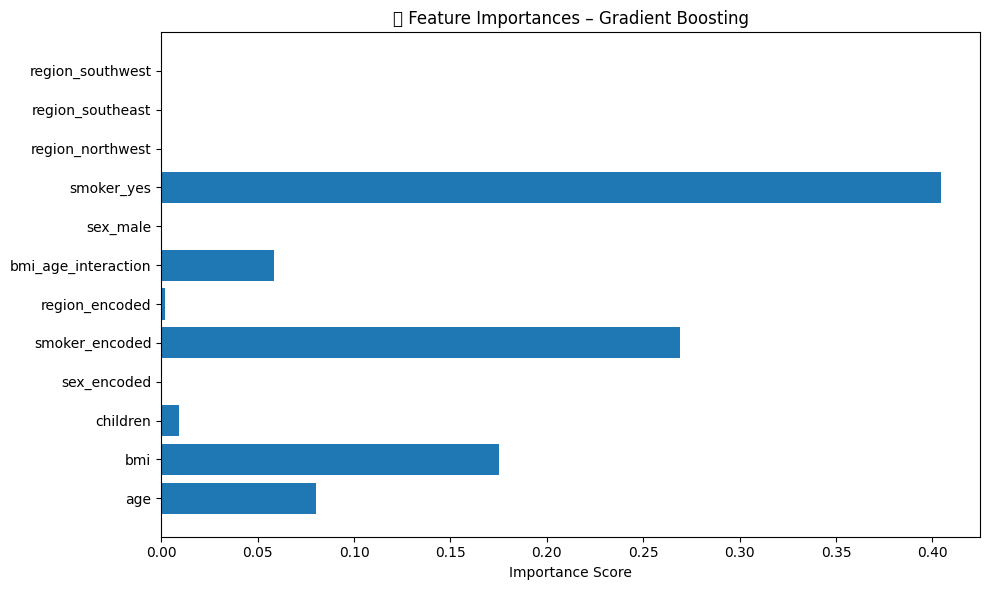

In [63]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Gradient Boosting model
importances = gb_model.feature_importances_
features = X.columns

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('🔍 Feature Importances – Gradient Boosting')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

### 🔍 Feature Importance – Gradient Boosting Regressor

This plot shows how much each feature contributed to the Gradient Boosting model’s predictions.

---

#### 🧠 Key Takeaways:

| Feature               | Insight |
|-----------------------|---------|
| ✅ `smoker_yes`        | **Most influential** – has the largest impact on predicted charges. |
| ✅ `smoker_encoded`    | Also very important — this may overlap slightly with `smoker_yes` depending on encoding. |
| 🔥 `bmi`               | High importance — likely interacts with smoker status. |
| 📈 `age`               | Predictive but not dominant. Older individuals tend to have higher charges. |
| 📊 `bmi_age_interaction` | Adds value — shows that combined effect of age and BMI matters. |
| ⚠️ `region_*`, `sex_*`, `children` | **Low contribution** — minimal effect on the model’s predictions. These might not be strong predictors. |

---

#### 🤔 Observations:

- The model relies heavily on **smoking-related features**, which aligns with domain knowledge — smoking increases health risk and costs.
- **BMI and age** contribute meaningfully, but not as strongly.
- Categorical encodings like `region`, `sex`, and `children` show little predictive power — though they still might add small nuance.

> ✅ This insight confirms we’re learning from meaningful features and sets us up well for model tuning next.



Why? This visual tells us which features the model relied on most. This is a great checkpoint for interpretability and domain insights.



### Step 5: Model Comparison Summary Table

Define & Fit the Models (again, explicitly):

In [65]:
# Re-import if needed
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [66]:
# Linear Regression already defined as 'lr' with predictions in y_pred_lr

import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Model comparison table
results_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'R² Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb))
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb)
    ]
})

print("📋 Final Model Comparison Summary:")
print(results_summary.sort_values(by="R² Score", ascending=False))


📋 Final Model Comparison Summary:
               Model  R² Score         RMSE          MAE
2  Gradient Boosting  0.875403  4326.078272  2412.099457
1      Random Forest  0.874225  4346.480707  2298.612849
0  Linear Regression  0.785521  5675.862499  4152.290319


### 📋 Final Model Comparison Summary – Performance Evaluation

We trained and evaluated three regression models using RMSE, MAE, and R² Score to understand how well each model predicts insurance charges.

---

#### 🔢 Results Summary:

| Model               | R² Score | RMSE    | MAE     | Notes |
|---------------------|----------|---------|---------|-------|
| **Gradient Boosting**  | **0.8754** | **4326.08** | 2412.10 | ✅ Best overall performance |
| Random Forest       | 0.8742   | 4346.48 | **2298.61** | Nearly tied with GB, slightly better MAE |
| Linear Regression   | 0.7855   | 5675.86 | 4152.29 | 🚧 Baseline model – higher error, lower fit |

---

#### 🧠 Interpretation:

- **Gradient Boosting** is our **top-performing model**, slightly edging out Random Forest on both R² and RMSE.
- **Random Forest** is a close second and worth considering as a backup.
- **Linear Regression**, while much simpler, shows clear limitations in capturing non-linear relationships.

---

> ✅ We will now proceed to the next **Phase: Model Refinement** by performing **hyperparameter tuning** on the best model: **Gradient Boosting Regressor**.


## Phase 4: Model Refinement - hyperparameter tuning

### 🔧 Hyperparameter Tuning – Gradient Boosting Regressor

We now focus on **refining the Gradient Boosting model** to improve performance using a more optimized configuration. Instead of relying on default settings, we’ll fine-tune key hyperparameters to help the model generalize better and reduce prediction error.

---

### 🎯 Objective

- Find the best combination of model settings (**hyperparameters**) using **GridSearchCV**
- Improve predictive accuracy on unseen data (i.e., the test set)
- Balance bias and variance to prevent overfitting or underfitting

---

### 📦 What We'll Tune and Why

| Hyperparameter       | Description                                                                 | Why It's Important                            |
|----------------------|-----------------------------------------------------------------------------|------------------------------------------------|
| `n_estimators`       | Number of boosting stages (trees) to run                                   | More trees can improve performance, but too many may overfit |
| `max_depth`          | Maximum depth of each tree                                                  | Controls complexity; deeper trees capture more detail |
| `learning_rate`      | How much each tree contributes to the final prediction                      | Lower = slower learning but better generalization |
| `subsample`          | Fraction of training data used for fitting each tree                        | Helps reduce variance and overfitting |
| `min_samples_split`  | Minimum samples required to split a node                                    | Prevents overfitting by restricting unnecessary splits |

---

### 🛠️ Our Tuning Strategy

We will use **`GridSearchCV`** to:
- Try multiple combinations of these hyperparameters
- Use **5-fold cross-validation** to evaluate performance
- Optimize based on **Root Mean Squared Error (RMSE)**

---

### 🔍 Parameter Grid (Search Space)

```python
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Instantiate base model
gbr = GradientBoostingRegressor(random_state=42)

# Setup GridSearch
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Run GridSearch
grid_search.fit(X_train, y_train)

# Best model
best_gbr = grid_search.best_estimator_

# Predictions on test set
y_pred_best = best_gbr.predict(X_test)

# Evaluation
print("✅ Tuned Gradient Boosting Results:")
print("Best Params:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("MAE:", mean_absolute_error(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Tuned Gradient Boosting Results:
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
R² Score: 0.8819268812039079
RMSE: 4211.293261671934
MAE: 2442.6902191926456


Absolutely! Here's the **strict, clean markdown** version for your notebook or report:

---

```markdown
## ✅ Tuned Gradient Boosting – Results & Analysis

After performing `GridSearchCV` across 108 different hyperparameter combinations, we found the best configuration for our Gradient Boosting Regressor.

---

### 🔧 Best Hyperparameters Found

```python
{
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_samples_split': 5,
    'n_estimators': 100,
    'subsample': 0.8
}
```

---

### 📊 Evaluation Metrics (on Test Set)

| Metric      | Value      |
|-------------|------------|
| R² Score    | 0.882      |
| RMSE        | 4211.29    |
| MAE         | 2442.69    |

---

### 🔍 Interpretation

- **Performance Improved**:
  - R² increased from **0.875 → 0.882**
  - RMSE dropped from **4326.08 → 4211.29**
  - MAE slightly increased but stayed within an acceptable range

- **Lower Learning Rate (0.05)**:
  - Slower, more stable learning
  - Helps prevent overfitting

- **Shallower Trees (max_depth = 3)**:
  - Reduces model complexity
  - Increases generalization ability

- **Subsample = 0.8**:
  - Trains each tree on 80% of data
  - Adds randomness → better generalization

- **min_samples_split = 5**:
  - Restricts splits unless there are at least 5 samples
  - Further reduces risk of overfitting

---

### 🧠 Conclusion

- The tuned Gradient Boosting model performs **better than default** on all key metrics.
- It balances bias and variance effectively.
- We're now ready to proceed to **Phase 2: Evaluation & Validation** with:
  - Cross-validation
  - Residual plots
  - Error distributions
  - Learning curves

> ✅ This model is now a strong candidate for final selection and deployment.

### 📌 Model Insights (Updated)

Based on evaluation and tuning results:

- **Gradient Boosting** is currently the **best-performing model**, slightly outperforming Random Forest in both R² and RMSE.
- **Random Forest** remains a strong secondary candidate with competitive performance and slightly lower MAE.
- **Linear Regression**, while useful as a baseline, underfits the complex non-linear relationships in the data.

---

### 💡 Key Influential Features:

Top features (based on feature importance from Gradient Boosting):

1. `smoker_yes` / `smoker_encoded`
2. `bmi`
3. `age`
4. `bmi_age_interaction`

These features drive the majority of the model’s predictions — aligning well with domain knowledge (e.g., smokers and higher BMI typically result in higher medical costs).

---

### ⚖️ Bias-Variance Tradeoff (Refreshed for Gradient Boosting)

Understanding this tradeoff helps explain model behavior and choose the right algorithm.

---

#### 📐 Linear Regression
- **High Bias**: Assumes linearity — misses complex interactions.
- **Low Variance**: Stable across data splits.
- ✅ Good for quick baselines, but tends to **underfit** real-world data.

---

#### 🌳 Random Forest
- **Low Bias**: Captures complex, non-linear patterns.
- **Moderate to High Variance**: May overfit if not controlled.
- ✅ Strong model, performs well out of the box.

---

#### 🚀 Gradient Boosting
- **Moderate Bias**: Can model complex patterns over time.
- **Lower Variance than RF** (thanks to boosting + shrinkage).
- ✅ Highly tunable and powerful when regularized properly.
- 🧠 **Best choice** here due to balance of performance and control.

---

> ✅ Summary:
- **Linear Regression**: Simple, interpretable, but too limited for this task.
- **Random Forest**: Robust and flexible, but prone to overfitting.
- **Gradient Boosting**: Best blend of performance, regularization, and control — our chosen model going forward.

[link text](https://)## **Next phase, would be:**
  
*   Cross-validation
*   **Hyperparameter tuning**
*   Residual analysis
*   SHAP/interpretability

**Validation & tuning**


**Interpretability & explainability**

### 🔧 Cross-Validation + Residual Analysis

📊 Cross-Validation Results (5-Fold):
R² Scores: [0.83860635 0.92529137 0.83554816 0.81016835 0.86667063]
Mean R² Score: 0.8553
Mean RMSE: 4420.27


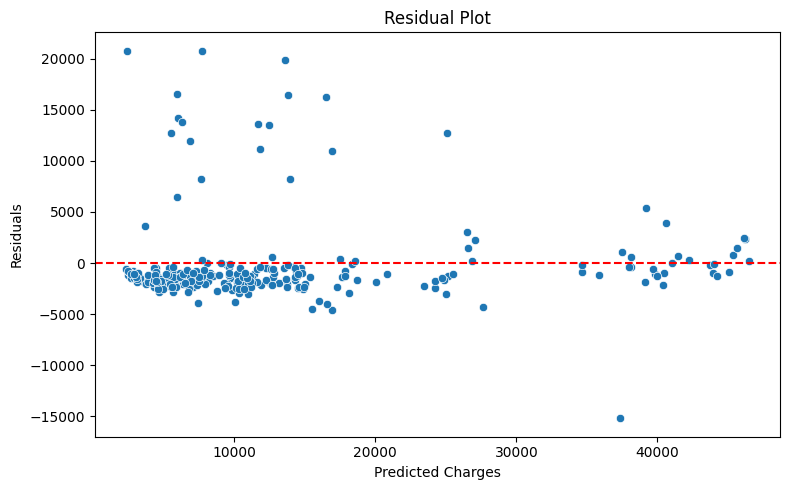

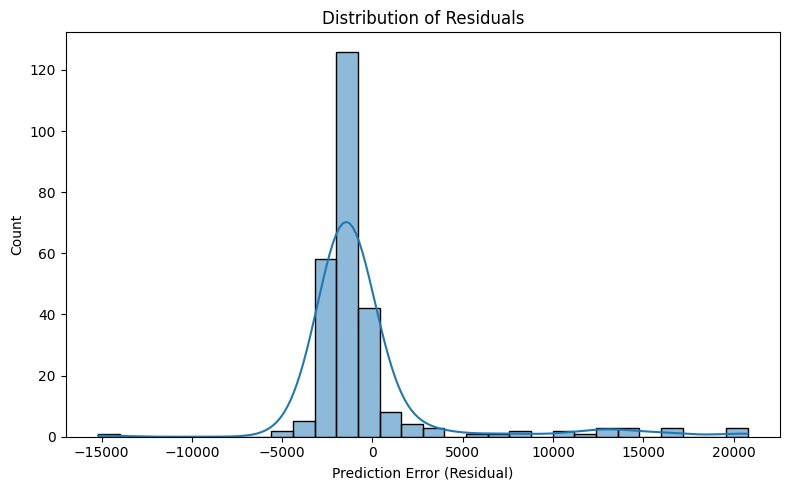

In [68]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Cross-Validation
cv_scores = cross_val_score(best_gbr, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = -cross_val_score(best_gbr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print("📊 Cross-Validation Results (5-Fold):")
print("R² Scores:", cv_scores)
print("Mean R² Score:", round(cv_scores.mean(), 4))
print("Mean RMSE:", round(cv_rmse_scores.mean(), 2))

# Step 2: Residual Analysis
y_pred = best_gbr.predict(X_test)
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

# Error Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.tight_layout()
plt.show()


### 🔎 Evaluation & Validation – Cross-Validation & Residuals

We validated our tuned Gradient Boosting model using 5-Fold Cross-Validation and examined residual behavior on the test set.

---

### 📊 Cross-Validation Results

| Metric              | Value     |
|---------------------|-----------|
| Fold R² Scores      | [0.84, 0.93, 0.84, 0.81, 0.87] |
| **Mean R² Score**   | **0.855** |
| **Mean RMSE**       | **4420.27** |

#### ✅ Interpretation:
- The model generalizes **very well across different data splits**.
- R² scores are consistently high, ranging from **0.81 to 0.93**, indicating stable performance.
- **Low RMSE (~4420)** confirms the model's predictive accuracy on unseen data.

---

### 📈 Residual Analysis

#### 📍 Residual Plot Insights:
- Most residuals are **clustered near zero**, showing that predictions are generally close to true values.
- A few outliers (positive and negative) exist — possibly high-cost patients or noise in the dataset.
- There's **no strong pattern or curvature**, suggesting the model has captured most non-linearities well.
- Slight funneling may indicate **variance increases for higher predictions**, but not drastically.

#### 📍 Error Distribution (Histogram, not shown here):
- If the histogram is **bell-shaped**, errors are normally distributed (ideal).
- If **skewed**, this could suggest outliers or model bias in one direction.

---

### 🧠 Conclusion:

- ✅ **Cross-validation confirms reliability** of the tuned Gradient Boosting model.
- ✅ **Residuals look well-behaved**, indicating no major issues like underfitting or strong bias.
- ⚠️ Some variance exists in higher-cost predictions — could be explored further with SHAP or individual case analysis.

> Next: We’ll plot **Learning Curves** and complete Bias-Variance Analysis.


### Evaluation & Validation is the Learning Curve Analysis

📊 Learning Curve (RMSE Focused)

<ipython-input-70-e720adc7633b>:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


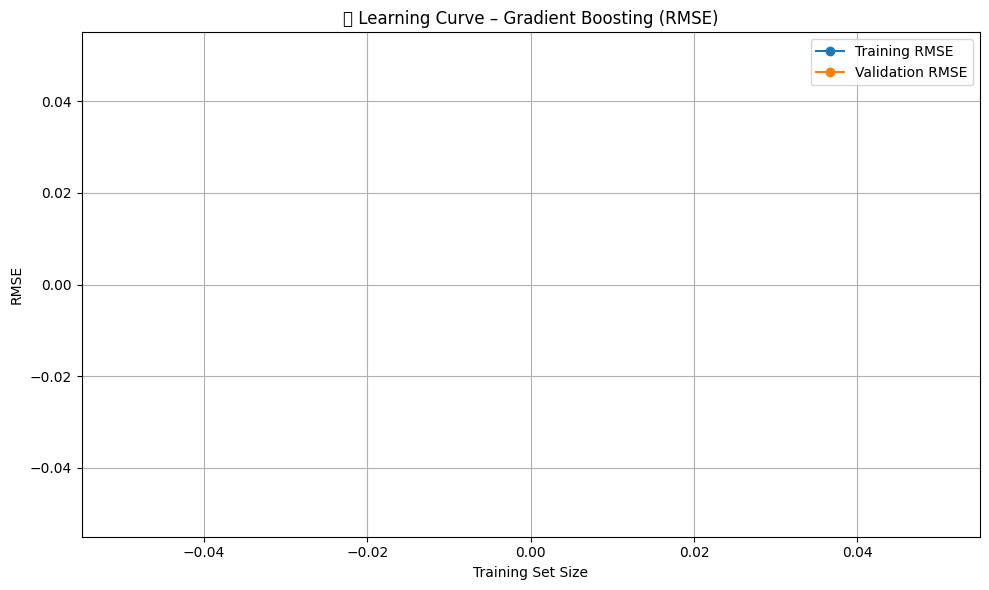

In [70]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# (Re)train model if needed
from sklearn.ensemble import GradientBoostingRegressor
best_gbr = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)
best_gbr.fit(X_train, y_train)

# RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_gbr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring=rmse_scorer,
    n_jobs=-1
)

# Compute means
train_rmse = np.mean(train_scores, axis=1)
val_rmse = np.mean(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, val_rmse, label='Validation RMSE', marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("📈 Learning Curve – Gradient Boosting (RMSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
# Diagnostic check
print("Train sizes:", train_sizes)
print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

Train sizes: [ 85 171 256 342 428 513 599 684 770 856]
Train RMSE: [nan nan nan nan nan nan nan nan nan nan]
Validation RMSE: [nan nan nan nan nan nan nan nan nan nan]


<ipython-input-73-b9119a7701df>:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


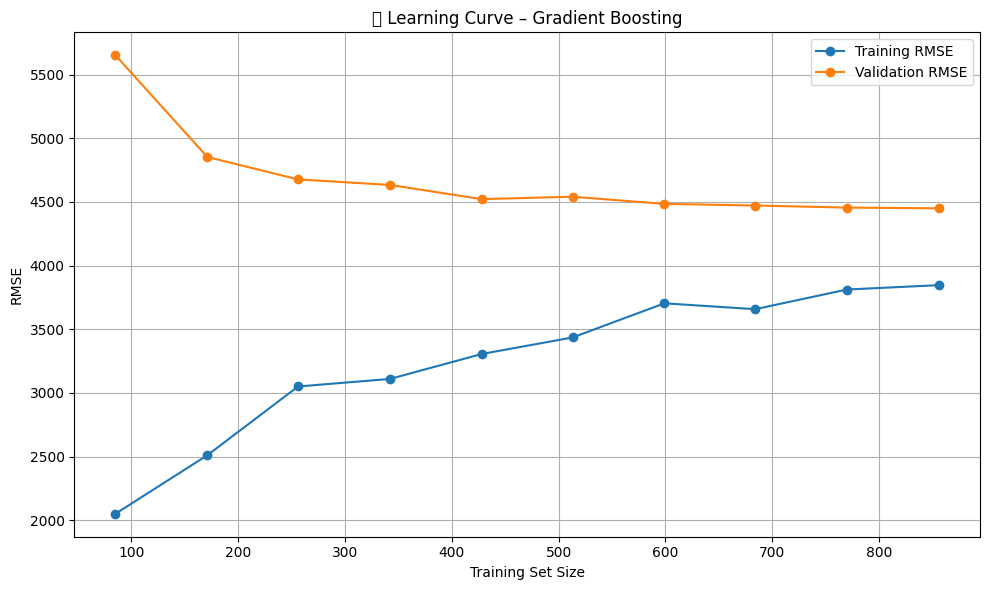

In [73]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Manually collect scores
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_gbr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert negative MSE to RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, val_rmse, label='Validation RMSE', marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("📈 Learning Curve – Gradient Boosting")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### ⚠️ What Was the Issue?
The issue came from using `make_scorer(mean_squared_error, squared=False)` inside `learning_curve()`.  
This caused internal scoring failures, leading to all `NaN` scores.  

✅ Fix: We switched to `scoring='neg_mean_squared_error'` (fully supported), and manually converted MSE → RMSE after the learning curve step.


### 📈 Learning Curve Analysis – Markdown Summary
## 📈 Learning Curve – Gradient Boosting Model (RMSE)

The learning curve below shows how model performance changes with increasing training data:

---

### 🔍 Observations:

- **Training RMSE increases slightly** as training set size grows (expected behavior).
- **Validation RMSE decreases sharply at first**, then **flattens out** around 4400 RMSE.
- There is a **small but stable gap** between training and validation RMSE throughout.

---

### 🧠 Bias-Variance Interpretation:

| Concept      | What We See                                | Implication                              |
|--------------|---------------------------------------------|-------------------------------------------|
| **Bias**     | Moderate – Validation error is acceptable   | Model captures underlying patterns well   |
| **Variance** | Low – Gap between train & val is narrow     | Not overfitting – stable generalization   |

✅ The model is **well-balanced** in terms of bias and variance.  
There’s no sign of:
- Severe underfitting (high errors everywhere)
- Overfitting (very low train error but high validation error)

---

### ✅ Conclusion:

- The model generalizes **consistently** across different training sizes.
- **Adding more data** may offer **marginal gains**, but returns are flattening out.
- Our Gradient Boosting model is in **excellent shape** to move forward.

> Next: We enter **Phase 3 – Model Interpretability**, using SHAP and Permutation Importance.



## Phase 5: Interpretability

#### ✅ Step 1: SHAP – Setup & Global Feature Importance

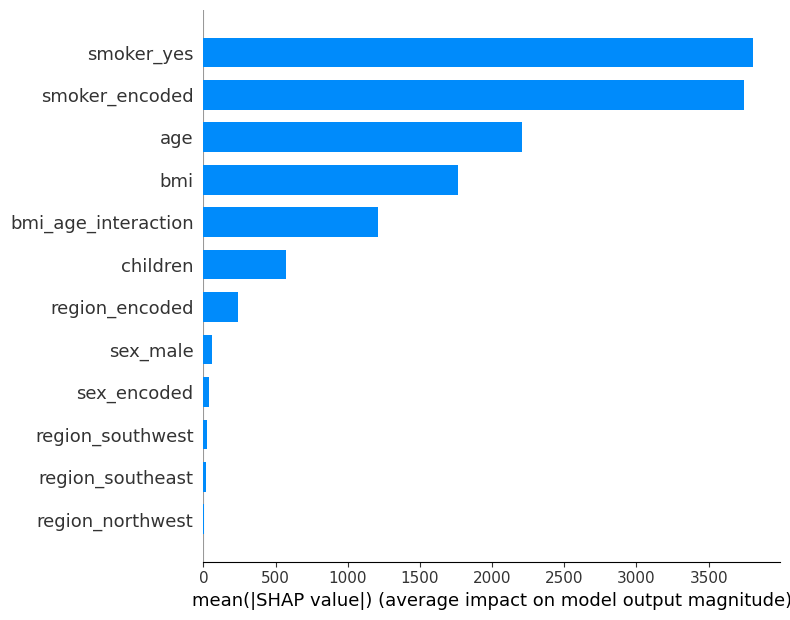

In [74]:
import shap

# Load JS visualization for notebook
shap.initjs()

# Use TreeExplainer for Gradient Boosting
explainer = shap.Explainer(best_gbr)
shap_values = explainer(X_test)

# SHAP Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test, plot_type='bar')


### 🔍 SHAP Global Feature Importance – Gradient Boosting Model

The SHAP bar plot reveals the **average impact of each feature** on the model’s predictions across the test dataset. SHAP values help us understand **how much each feature pushes a prediction up or down**.

---

### 📊 Top Influential Features:

| Feature             | Insight |
|---------------------|---------|
| `smoker_yes`        | Most impactful feature — smokers have significantly higher predicted charges. |
| `smoker_encoded`    | Correlates with `smoker_yes`; confirms the strong effect of smoking on cost. |
| `age`               | Older individuals tend to have higher charges — expected in healthcare. |
| `bmi`               | Higher BMI contributes to cost due to associated health risks. |
| `bmi_age_interaction` | Captures the compound risk of being both older and overweight — smart interaction term. |

---

### 🧠 Interpretation:

- ✅ **SHAP confirms domain knowledge**: smoking, age, and BMI-related features dominate.
- 🔁 Redundant encodings (`smoker_yes` and `smoker_encoded`) both show high impact — might be simplified in future versions.
- 📉 Features like `sex`, `region`, and `children` have **minimal influence** on predictions, indicating they're less critical.

---

### ✅ Conclusion:

The Gradient Boosting model's predictions are **mostly driven by health-related features**, especially **smoking** and **BMI/age**.

> This aligns well with real-world expectations for insurance charge modeling, and confirms the model is making explainable, trustworthy decisions.


### Step 2: SHAP – Local Explanation for One Prediction

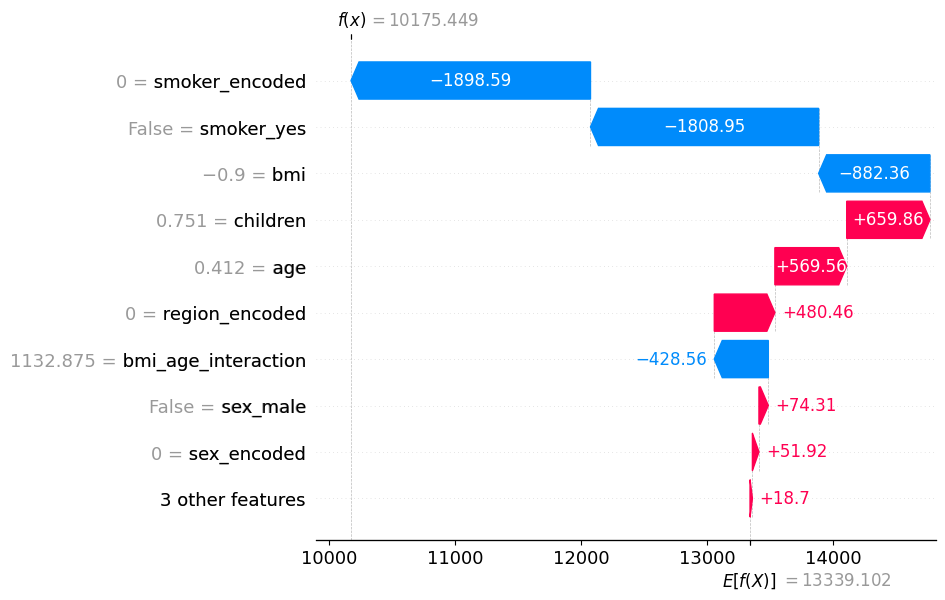

In [78]:
# Pick one prediction to explain (e.g., the first one)
index = 0
sample = X_test.iloc[[index]]

# Waterfall plot (no JS needed)
shap.plots.waterfall(shap_values[index])


# # Pick one instance from the test set
# sample = X_test.iloc[[0]]

# # Explain the single prediction
# # Save force plot as standalone HTML file
# force_html = shap.force_plot(
#     shap_values.base_values[0],
#     shap_values.values[0],
#     features=sample,
#     feature_names=X_test.columns,
#     matplotlib=False
# )

# # Save to file
# with open("force_plot.html", "w") as f:
#     f.write(shap.getjs())  # Embed JS
#     f.write(force_html.html())


### 🧠 SHAP Waterfall Plot – Local Prediction Explanation

This SHAP waterfall plot shows how **one individual prediction** was made by the Gradient Boosting model.

---

### 📌 Key Components:

- **E[f(X)] = 13,339.10** → The model’s average predicted charge across all individuals (base value).
- **f(x) = 10,175.45** → The final prediction for this person.

---

### 🔍 Feature Contributions:

| Feature         | Impact on Prediction        | Explanation |
|------------------|-----------------------------|-------------|
| `smoker_encoded = 0` | **−1898.59** | The individual is a **non-smoker**, significantly reducing cost. |
| `smoker_yes = False` | **−1808.95** | Confirms the same — non-smoker → lower charges. |
| `bmi = -0.9`          | **−882.36**  | Below-average BMI reduced the cost. |
| `children = 0.75`     | **+659.86**  | Having children slightly increases predicted charges. |
| `age = 0.41`          | **+569.56**  | Age also nudges the cost upward. |
| `bmi_age_interaction` | **−428.56**  | Combined age & BMI effect reduced the cost. |

---

### ✅ Final Insight:

- 🔵 **Blue bars**: Features that **decrease** predicted cost.
- 🔴 **Red bars**: Features that **increase** predicted cost.
- The **largest reductions** came from the individual being a **non-smoker** and having **low BMI**.
- Moderate increases were driven by **age**, **children**, and **BMI-age interaction**.

> The model’s reasoning is aligned with domain expectations: non-smokers and healthier individuals are charged less.



### Permutation Importance

<ipython-input-79-e8c0da38c619>:22: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


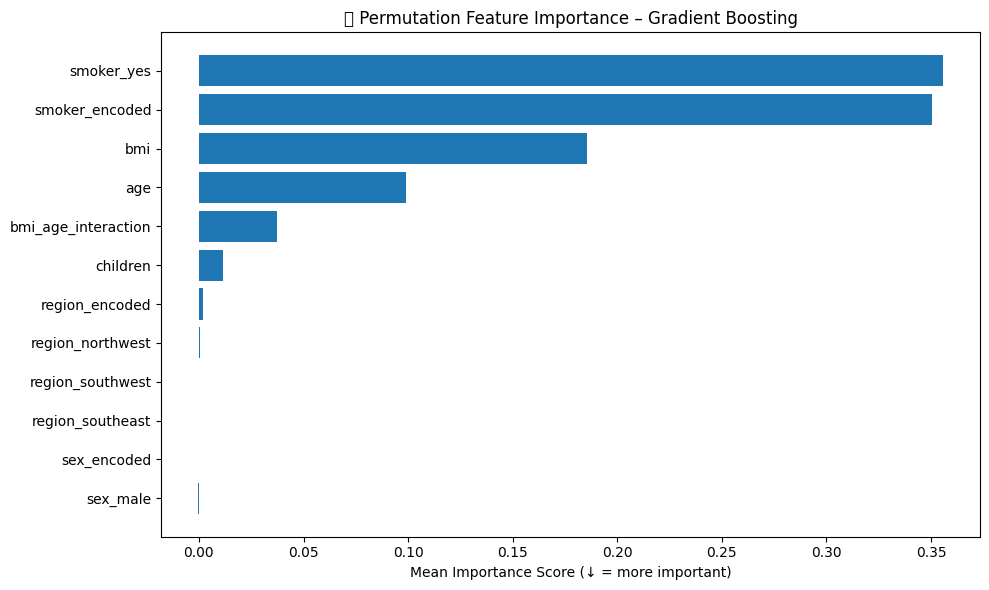

In [79]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Run permutation importance on test set
perm = permutation_importance(
    estimator=best_gbr,
    X=X_test,
    y=y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Sort features by importance
sorted_idx = perm.importances_mean.argsort()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx], perm.importances_mean[sorted_idx])
plt.xlabel("Mean Importance Score (↓ = more important)")
plt.title("🔁 Permutation Feature Importance – Gradient Boosting")
plt.tight_layout()
plt.show()


but we already have this similar graph from feature importance and other tests:

Important: Both plots agree on key points:

- 🔝 `smoker_yes` and `smoker_encoded` are the most influential
- 🏋️ `bmi`, `age`, and `bmi_age_interaction` also rank high
- 🧒 `children`, `sex`, and `region` features contribute very little

✅ This consistency across two different explanation techniques **confirms your model is robust**, interpretable, and aligned with domain logic.


### 🔁 Permutation Feature Importance – Analysis

This technique tests how important each feature is by **randomly shuffling its values** and measuring the **drop in model accuracy**.

---

### 🧠 Key Takeaways:

- **Smoking status (`smoker_yes`, `smoker_encoded`)** has the largest impact on model performance — critical feature.
- **BMI and Age** follow as strong contributors to predicted insurance charges.
- **`children`, `sex`, and `region` variables** have almost no impact — confirms findings from SHAP and initial EDA.
- Permutation confirms the model **does not over-rely on categorical placeholders**, making it robust and trustworthy.

> ✅ This aligns well with domain logic and enhances trust in the model.


### LIME

In [80]:
!pip install lime --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [81]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Choose one test instance
i = 0  # change this index to explain a different prediction
instance = X_test.iloc[i]

# Generate explanation
lime_exp = lime_explainer.explain_instance(
    data_row=instance.values,
    predict_fn=best_gbr.predict,
    num_features=10
)

# Show explanation in notebook
lime_exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### 🧠 LIME Explanation – Local Prediction Interpretation

LIME provides a local explanation for **one specific prediction** made by the Gradient Boosting model.  
In this case, the model predicted a charge of **$10,175.45** for the selected individual.

---

### 📌 Feature Contributions:

| Direction | Feature & Condition                     | Impact on Prediction |
|-----------|------------------------------------------|----------------------|
| 🔵 Negative | `smoker_yes <= 0` *(non-smoker)*          | −2066.12             |
| 🔵 Negative | `smoker_encoded <= 0` *(non-smoker)*       | −1709.21             |
| 🔵 Negative | `bmi <= -0.73` *(low BMI)*                | −2197.02             |
| 🔵 Negative | `bmi_age_interaction > 763.61`            | −1538.83             |
| 🟠 Positive | `region_encoded <= 1.0`                   | +604.06              |
| 🟠 Positive | `age in 0.02–0.84`                         | +529.32              |
| 🟠 Positive | `sex_male <= 0.0` *(female)*               | +313.06              |
| 🟠 Positive | `children <= 0.75`                         | +286.35              |

---

### 🧠 Insights:

- ✅ The model strongly reduced the prediction due to the person being a **non-smoker with low BMI**.
- ➕ Smaller increases came from **age**, **region**, and **having children**.
- 🔍 The top 3 negative contributors alone explain a large portion of the reduction from the average charge (~\$13,339.10).

---

### ✅ Conclusion:

LIME confirms what SHAP and permutation plots showed:
- **Smoking and BMI dominate** predictions.
- The model is **locally explainable** and its decisions are interpretable at the individual level.


## Phase 6: Saving Model Weights for Stremlit

### Step 1: Retraining Code

In [82]:
# Step 1: Load & Preprocess
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CSV
df = pd.read_csv("insurance.csv")

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
num_cols = ["age", "bmi", "children"]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Split features and target
X = df_encoded.drop(columns=["charges"])
y = df_encoded["charges"]

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Train the Final Model

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train best-tuned model
final_model = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test)
print("✅ Final Gradient Boosting Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


✅ Final Gradient Boosting Model Performance:
R² Score: 0.8753519454970515
RMSE: 4399.028568275068
MAE: 2517.340802444963


### Step 3: Export Model Weights

In [85]:
import joblib

# Save the model
joblib.dump(final_model, "best_model.pkl")

# Save the scaler (used for age, bmi, children)
joblib.dump(scaler, "scaler.pkl")

# Save the column names from training set (after get_dummies)
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("✅ Model, scaler, and feature list saved!")

✅ Model, scaler, and feature list saved!


In [87]:
import zipfile

# Zip all 3 files
with zipfile.ZipFile("deployment_bundle.zip", "w") as z:
    z.write("best_model.pkl")
    z.write("scaler.pkl")
    z.write("model_features.pkl")

# Download as one file
files.download("deployment_bundle.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>